# Lista de exercícios 9 - MNUM-7077

#### Antonio C. da Silva Júnior

In [1]:
import numpy as np

## Exercício 1

In [2]:
# Dados fornecidos:

arestas = [(1,2), (1,3), (2,4), (3,4), (3,5), (3,6), (4,5), (4,9), (5,9), (5,8), (5,6), (6,7), (7,10), (7,11), (8,9), (8,10), (9,10), (10,12), (11,12),
            (2,1), (3,1), (4,2), (4,3), (5,3), (6,3), (5,4), (9,4), (9,5), (8,5), (6,5), (7,6), (10,7), (11,7), (9,8), (10,8), (10,9), (12,10), (12,11)]

custos = [10, 7, 4, 6, 8, 5, 9, 8, 20, 10, 7, 22, 9, 6, 7, 4, 7, 13, 11,
          10, 7, 4, 6, 8, 5, 9, 8, 20, 10, 7, 22, 9, 6, 7, 4, 7, 13, 11]

In [3]:
# Calcula o número de nós do grafo:

nos = []
for aresta in arestas:
    if aresta[0] not in nos:
        nos.append(aresta[0])
    if aresta[1] not in nos:
        nos.append(aresta[1])
nos.sort()
n = len(nos)
n

12

In [4]:
# Constroi a matriz de custos:

cij = np.empty((n, n))
cij[:] = 0

for i in range(len(arestas)):
    aresta = arestas[i]
    o = aresta[0]-1
    d = aresta[1]-1
    c = custos[i]
    cij[o][d] = c
    
cij

array([[ 0., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  6.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  6.,  0.,  9.,  0.,  0.,  0.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  9.,  0.,  7.,  0., 10., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  7.,  0., 22.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  9.,  6.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  7.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 20.,  0.,  0.,  7.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  7.,  0.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.]])

### Resolução por Prim

In [5]:
no_inicial = 1

In [6]:
# Inicializa as listas:
nos_conectados = [no_inicial]
arestas_selecionadas = []

In [7]:
iteracao = 1
while len(nos_conectados) < n:
    # Seleciona a aresta com origem nos nós conectados com menor custo:
    menor_custo = float('inf')
    aresta_menor_custo = None
    for no in nos_conectados:
        for i in range(n):
            if i+1 == no:
                for j in range(n):
                    custo = cij[i][j]
                    if j+1 not in nos_conectados and custo > 0 and custo < menor_custo:
                        menor_custo = custo
                        aresta_menor_custo = (i+1,j+1)
    nos_conectados.append(aresta_menor_custo[1])
    nos_conectados.sort()
    arestas_selecionadas.append(aresta_menor_custo)
    print("####### Iteração", iteracao, "#######")
    print("Menor custo:", menor_custo)
    print("Nós conectados", nos_conectados)
    print("Arestas conectadas", arestas_selecionadas)
    print("")
    iteracao += 1

####### Iteração 1 #######
Menor custo: 7.0
Nós conectados [1, 3]
Arestas conectadas [(1, 3)]

####### Iteração 2 #######
Menor custo: 5.0
Nós conectados [1, 3, 6]
Arestas conectadas [(1, 3), (3, 6)]

####### Iteração 3 #######
Menor custo: 6.0
Nós conectados [1, 3, 4, 6]
Arestas conectadas [(1, 3), (3, 6), (3, 4)]

####### Iteração 4 #######
Menor custo: 4.0
Nós conectados [1, 2, 3, 4, 6]
Arestas conectadas [(1, 3), (3, 6), (3, 4), (4, 2)]

####### Iteração 5 #######
Menor custo: 7.0
Nós conectados [1, 2, 3, 4, 5, 6]
Arestas conectadas [(1, 3), (3, 6), (3, 4), (4, 2), (6, 5)]

####### Iteração 6 #######
Menor custo: 8.0
Nós conectados [1, 2, 3, 4, 5, 6, 9]
Arestas conectadas [(1, 3), (3, 6), (3, 4), (4, 2), (6, 5), (4, 9)]

####### Iteração 7 #######
Menor custo: 7.0
Nós conectados [1, 2, 3, 4, 5, 6, 8, 9]
Arestas conectadas [(1, 3), (3, 6), (3, 4), (4, 2), (6, 5), (4, 9), (9, 8)]

####### Iteração 8 #######
Menor custo: 4.0
Nós conectados [1, 2, 3, 4, 5, 6, 8, 9, 10]
Arestas conectad

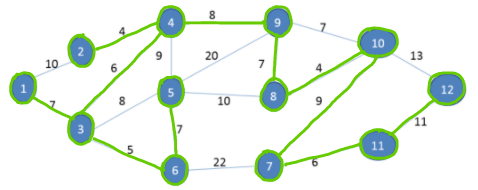

### Resolução por Kruskal

In [8]:
def verificar_se_fecha_ciclo(aresta_candidata, arestas_selecionadas):
    iteracoes = 1
    aresta_referencia = aresta_candidata
    fecha_ciclo = False
    arestas_verificadas = []
    while iteracoes < n:
        for aresta in arestas_selecionadas:
            if aresta not in arestas_verificadas:
                if aresta_referencia[0] == aresta[0]:
                    aresta_referencia = aresta
                if aresta_referencia[0] == aresta[1]:
                    aresta_referencia = aresta
                if aresta_referencia[1] == aresta[0]:
                    aresta_referencia = aresta
                if aresta_referencia[1] == aresta[1]:
                    aresta_referencia = aresta
        if aresta_referencia not in arestas_verificadas:
            arestas_verificadas.append(aresta_referencia)
        if len(arestas_verificadas) > 1 and (aresta_referencia[0] == aresta_candidata[1] or aresta_referencia[1] == aresta_candidata[1]):
            fecha_ciclo = True
        if len(arestas_verificadas) > 1 and (aresta_referencia[0] == aresta_candidata[0] or aresta_referencia[1] == aresta_candidata[0]):
            fecha_ciclo = True
        iteracoes += 1
    return fecha_ciclo

In [9]:
# Lista de arestas em ordem crescente:

arestas_ordenadas = []

loop = True
while loop:
    menor_custo = float('inf')
    aresta_menor_custo = None
    for i in range(n):
        for j in range(n):
            aresta = (i+1, j+1)
            aresta_1 = (j+1, i+1)
            custo = cij[i][j]
            if custo > 0 and custo < menor_custo:
                if aresta not in arestas_ordenadas and aresta_1 not in arestas_ordenadas:
                    aresta_menor_custo = aresta
                    menor_custo = custo
    if aresta_menor_custo is not None:
        arestas_ordenadas.append(aresta_menor_custo)
    else:
        loop = False   

In [10]:
# Adiciona as arestas na solução final:

arestas_selecionadas = []

iteracao = 1
for aresta in arestas_ordenadas:
    if aresta not in arestas_selecionadas:
        fecha_ciclo = verificar_se_fecha_ciclo(aresta, arestas_selecionadas)
        if not fecha_ciclo:
            arestas_selecionadas.append(aresta)
            print("####### Iteração", iteracao, "#######")
            print("Arestas conectadas", arestas_selecionadas)
            print("")
            iteracao += 1
    if len(arestas_selecionadas) == n-1:
        break

####### Iteração 1 #######
Arestas conectadas [(2, 4)]

####### Iteração 2 #######
Arestas conectadas [(2, 4), (8, 10)]

####### Iteração 3 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6)]

####### Iteração 4 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4)]

####### Iteração 5 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11)]

####### Iteração 6 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11), (1, 3)]

####### Iteração 7 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11), (1, 3), (5, 6)]

####### Iteração 8 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11), (1, 3), (5, 6), (8, 9)]

####### Iteração 9 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11), (1, 3), (5, 6), (8, 9), (11, 12)]

####### Iteração 10 #######
Arestas conectadas [(2, 4), (8, 10), (3, 6), (3, 4), (7, 11), (1, 3), (5, 6), (8, 9), (11, 12), (5, 9)]

####### Iteração 11 #######
Arestas conectadas [(2, 4), (8, 

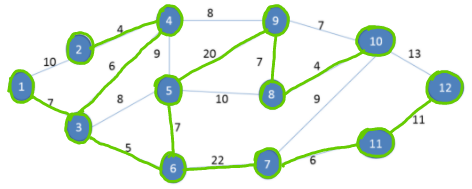

## Exercício 2

In [11]:
# Dados fornecidos:

arcos = [(1,2), (1,3), (2,4), (3,4), (3,5), (3,6), (4,5), (4,9), (5,9), (5,8), (5,6), (6,7), (7,10), (7,11), (8,9), (8,10), (9,10), (10,12), (11,12)]
capacidades = [10, 7, 4, 6, 8, 5, 9, 8, 20, 10, 7, 22, 9, 6, 7, 4, 7, 13, 11]

In [12]:
# Calcula o número de nós do grafo:

nos = []
for arco in arcos:
    if arco[0] not in nos:
        nos.append(arco[0])
    if arco[1] not in nos:
        nos.append(arco[1])
nos.sort()
n = len(nos)
n

12

In [13]:
# Constroi as matrizes (capacidade máxima e resíduos):

cij = np.empty((n, n))
cij[:] = 0

for i in range(len(arcos)):
    arco = arcos[i]
    o = arco[0]-1
    d = arco[1]-1
    c = capacidades[i]
    cij[o][d] = c

rij = cij.copy()

In [14]:
# Matriz de capacidades:
cij

array([[ 0., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  7.,  0., 10., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [15]:
# Matriz de resíduos (inicialmente assume os mesmos valores da matriz de capacidades, entretanto, 
# a cada iteração do algoritmo os valores vão sendo subtraídos)
rij

array([[ 0., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  7.,  0., 10., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [16]:
# Inicialização das variáveis e definição das funções necessárias:

no_inicial = 1 # ponto de origem
no_final = 12 # ponto de destino
todos_trajetos = [] # lista que ira comprotar todos os trajetos

def obter_proximo_arco(no_origem, cij):
    proximo_arco = None
    vlr_capac = 0
    for arco in arcos:
        if arco[0] == no_origem:
            c = cij[no_origem-1][arco[1]-1]
            if c > vlr_capac:
                vlr_capac = c
                proximo_arco = arco
    return proximo_arco, vlr_capac


def atualizar_matriz_residuos(arcos_trajeto, capacidades_trajeto):
    capac_minima = min(capacidades_trajeto)
    for i in range(len(arcos_trajeto)):
        arco = arcos_trajeto[i]
        c = capacidades_trajeto[i]
        r = c - capac_minima
        rij[arco[0]-1][arco[1]-1] = r
    return rij


def obter_fluxo_maximo(cij, rij, no_final):
    fluxo_maximo = sum(cij[:,no_final-1] - rij[:, no_final-1])
    msg = "Fluxo máximo no ponto {no_final}: {fluxo_maximo}".format(no_final = no_final, fluxo_maximo = fluxo_maximo)
    print(msg)
    return fluxo_maximo

In [17]:
# Rotina para gerar todas as rotas possíveis. Encerra quando não for possível mais iniciar no ponto 1 e terminar no ponto 12

loop_ativo = True
while loop_ativo:
    arcos_trajeto = []
    capacidades_trajeto = []
    no_origem = no_inicial
    
    while no_origem != no_final:
        proximo_arco, capacidade = obter_proximo_arco(no_origem, rij)
        if proximo_arco is None:
            break
        arcos_trajeto.append(proximo_arco)
        capacidades_trajeto.append(capacidade)
        no_origem = proximo_arco[1]
    
    if len(arcos_trajeto) == 0:
        break
    if arcos_trajeto[len(arcos_trajeto)-1][1] == no_final:
        todos_trajetos.append(arcos_trajeto)
        rij = atualizar_matriz_residuos(arcos_trajeto, capacidades_trajeto)
    else:
        arco = arcos_trajeto[len(arcos_trajeto)-1]
        rij[arco[0]-1][arco[1]-1] = 0

In [18]:
# Todos os trajetos:
for i in range(len(todos_trajetos)):
    trajeto = todos_trajetos[i]
    msg = "Trajeto {num}: {trajeto}".format(num = i, trajeto = trajeto)
    print(msg)

Trajeto 0: [(1, 2), (2, 4), (4, 5), (5, 9), (9, 10), (10, 12)]
Trajeto 1: [(1, 3), (3, 5), (5, 9), (9, 10), (10, 12)]
Trajeto 2: [(1, 3), (3, 4), (4, 5), (5, 8), (8, 10), (10, 12)]


In [19]:
# Obtendo o fluxo máximo no ponto final:
fluxo_maximo = obter_fluxo_maximo(cij, rij, no_final)

Fluxo máximo no ponto 12: 11.0


### Ilustração:

#### Iteração 1:

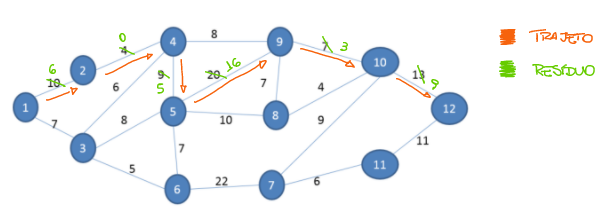

#### Iteração 2:

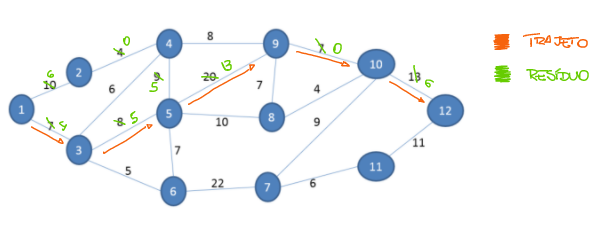

#### Iteração 3:

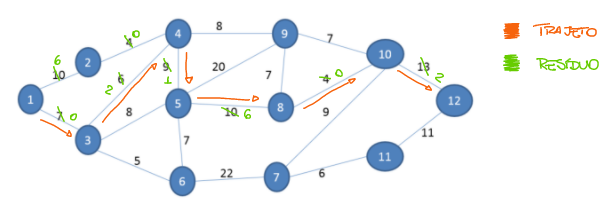